## Hacker Statistics

Here we use the skills learnt till now to caculate chances of winning a bet! This is a small project/exercise!

- we are playing the empire state bet game where we want to know: What are the odds that you'll reach 60 steps high on the Empire State Building?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

numpy random module includes methods for generating pseudo-random numbers. 

rand() methods creates random numbers between 0-1

In [2]:
np.random.seed(123)
print(np.random.rand())

0.6964691855978616


Simulating a die roll:

randint generates random numbers between start and stop(not inclusive)

In [4]:
np.random.seed(123)
print(np.random.randint(1,7))
print(np.random.randint(1,7))


6
3


We play the empire state building bet and our move depends on the eyes we throw:
if we throw 2 or less we go 1 step down, otherwise we go 1 step up. Assume we start from step 50. 

In [5]:
step = 50
dice = np.random.randint(1,7)

if dice <= 2 :
    step = step - 1
elif dice <= 5 :
    step = step +1
else :
    step = step + np.random.randint(1,7)
print(dice)
print(step)

5
51


Now we will simulate a random walk, using the above code. We start from 0 and throw the dice to find out our next move. We do this 100 times and see where we end up.

In [6]:
random_walk = [0]
for x in range(100):
    step = random_walk[-1]
    dice = np.random.randint(1,7)
    
    if dice <= 2:
        step = step - 1
    elif dice <= 5:
        step = step + 1
    else:
        step = step + np.random.randint(1,7)
    random_walk.append(step)

print(random_walk)

[0, 1, 0, 1, 2, 3, 2, 1, 0, -1, -2, -3, -4, -5, -4, 1, 0, -1, 0, -1, 0, 1, 2, 3, 4, 3, 4, 3, 4, 5, 6, 7, 6, 10, 11, 10, 11, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22, 23, 28, 29, 33, 34, 33, 34, 35, 34, 35, 36, 38, 39, 40, 39, 38, 39, 40, 39, 38, 39, 40, 42, 41, 40, 41, 40, 41, 42, 43, 45, 44, 45, 46, 47, 48, 49, 48, 47, 48, 47, 48, 49, 48, 51, 52, 53, 54, 53, 54, 55, 59, 58]


Practically, it is imporrible to go in negatives as we can only go UP. We can add some checks in the above code:

In [7]:
np.random.seed(123)
random_walk = [0]

for x in range(100) :
    step = random_walk[-1]
    dice = np.random.randint(1,7)

    if dice <= 2:
        step = max(0, step - 1)
    elif dice <= 5:
        step = step + 1
    else:
        step = step + np.random.randint(1,7)

    random_walk.append(step)

print(random_walk)

[0, 3, 4, 5, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1, 0, 0, 1, 6, 5, 4, 5, 4, 5, 6, 7, 8, 9, 8, 9, 8, 9, 10, 11, 12, 11, 15, 16, 15, 16, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 33, 34, 38, 39, 38, 39, 40, 39, 40, 41, 43, 44, 45, 44, 43, 44, 45, 44, 43, 44, 45, 47, 46, 45, 46, 45, 46, 47, 48, 50, 49, 50, 51, 52, 53, 54, 53, 52, 53, 52, 53, 54, 53, 56, 57, 58, 59, 58, 59, 60]


Now we visualise the walk using a plot.

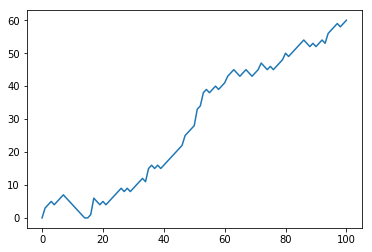

In [8]:
plt.plot(random_walk)
plt.show()

So we can construct 1 walk and then visualise it. Next we look at generating multiple walks. 

In [10]:
all_walks = []
for i in range(10) :
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)

        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        random_walk.append(step)

    all_walks.append(random_walk)


Now let us visualise all the simulated walks with matplotlib. We create line plots for each walk.

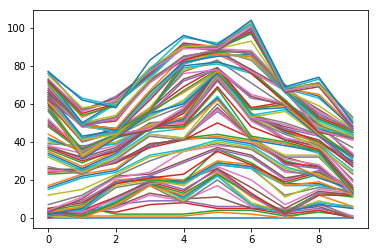

In [11]:
np_aw = np.array(all_walks)

plt.plot(np_aw)
plt.show()


This does not seem right. We need to transpose the array to get the right plot.

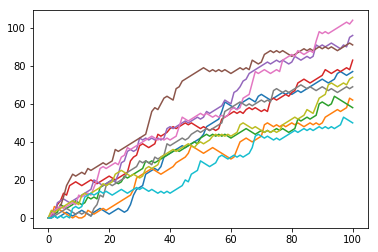

In [13]:
np_aw_t = np.transpose(np_aw)

# Plot np_aw_t and show
plt.plot(np_aw_t)
plt.show()

Now we add a bit of randomness where we simulate that with a 0.1% probability we can fall dawn. Also we simulate 250 walks instead of just 10.

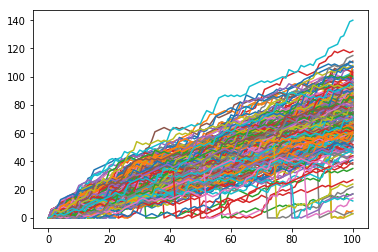

In [14]:
all_walks = []
for i in range(250) :
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)

        if np.random.random() <= 0.001 :
            step = 0

        random_walk.append(step)
    all_walks.append(random_walk)

np_aw_t = np.transpose(np.array(all_walks))
plt.plot(np_aw_t)
plt.show()

We want to find the distribution of the end points to figure out our odds of reaching floor 60. 
We select the last element of each walk and plot a histogram to see its distribution.

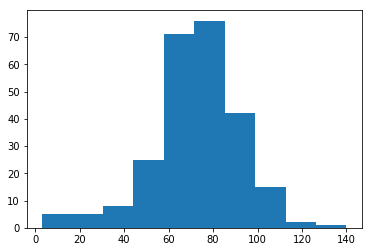

In [16]:
ends = np_aw_t[-1,:]
plt.hist(ends)
plt.show()

In [20]:
sum(ends >= 60)/len(ends)

0.804

Our odds of reaching the 60 the floor is 80.4% based on our simulated walks!